# Import Framework and Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix

# Load Dataset

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_table('Dataset/df_clustered.csv',sep=',')
data.head(5)

,Income,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Items_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Cluster
0,58138.0,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4,1
1,46344.0,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2,2
2,71613.0,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10,3
3,26646.0,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4,2
4,58293.0,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6,2


In [3]:
data.shape

(2208, 19)

# Data Splitting

In [4]:
x = data.drop(labels='Cluster', axis=1)
y = data['Cluster']

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle=True)

len(x_train) , len(y_test) , type(x_test) , type(y_train)

(1766, 442, pandas.core.frame.DataFrame, pandas.core.series.Series)

# Training

In [5]:

logistic = LogisticRegression(max_iter = 400, solver='liblinear', random_state=12)
logistic.fit(X= x_train, y= y_train)

LogisticRegression(max_iter=400, random_state=12, solver='liblinear')

In [6]:
extratree = ExtraTreesClassifier(n_estimators=400)
extratree.fit(x_train, y_train)

ExtraTreesClassifier(n_estimators=400)

In [7]:

svm = SVC(kernel='linear', C=1, random_state=12)
svm.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=12)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Untuk Algoritma Pertama saya menggunakan <i> Logistic Regression Multi-Class </i>. Karena menurut saya <i> Regresi Logistik</i> itu sangat baik untuk Mengklasifikasikan sebuah data yg terstruktur. <br>

Algoritma kedua saya menggunakan Algoritma <i>Extra Trees</i>. <i>Extra Trees </i> termasuk ke dalam Teknik Ensemble dgn Kategori <i>Bagging (Bootstrap Aggregating)<i> dan mirip dgn <i>Random Forest</i>. Alasan saya menggunakan <i>Extra Trees</i> karena ia lebih cepat dibanding Algoritma <i>Bagging</i> Lainnya , dan lebih cepat daripada <i>Random Forest</i>

untuk algoritma ketiga saya menggunakan support vector machine yg cocok untuk dataset ini

# Evaluation

In [8]:
# LOGISTIC REGRESSION

y_pred_logistic_test = logistic.predict(x_test)

accuracy_logistic_test   = accuracy_score  (y_true= y_test, y_pred= y_pred_logistic_test)
f1_logistic_test         = f1_score        (y_true= y_test, y_pred= y_pred_logistic_test, average='weighted')
precision_logistic_test  = precision_score (y_true= y_test, y_pred= y_pred_logistic_test, average='weighted')
recall_logistic_test     = recall_score    (y_true= y_test, y_pred= y_pred_logistic_test, average='weighted')

print(f'EVALUASI DATA TESTING')
print(f'Accuracy Score : {accuracy_logistic_test}')
print(f'F1 Score       : {f1_logistic_test}')
print(f'precision_score: {precision_logistic_test}')
print(f'Recall Score   : {recall_logistic_test}\n')


# ------------------------------------------------------------------------------------------------------------------


y_pred_logistic_train = logistic.predict(x_train)

accuracy_logistic_train   = accuracy_score  (y_true= y_train, y_pred= y_pred_logistic_train)
f1_logistic_train         = f1_score        (y_true= y_train, y_pred= y_pred_logistic_train, average='weighted')
precision_logistic_train  = precision_score (y_true= y_train, y_pred= y_pred_logistic_train, average='weighted')
recall_logistic_train     = recall_score    (y_true= y_train, y_pred= y_pred_logistic_train, average='weighted')

print(f'EVALUASI DATA TRAINING')
print(f'Accuracy Score : {accuracy_logistic_train}')
print(f'F1 Score       : {f1_logistic_train}')
print(f'precision_score: {precision_logistic_train}')
print(f'Recall Score   : {recall_logistic_train}')

EVALUASI DATA TESTING
Accuracy Score : 0.9434389140271493
F1 Score       : 0.9436918732382706
precision_score: 0.9440597947812154
Recall Score   : 0.9434389140271493

EVALUASI DATA TRAINING
Accuracy Score : 0.9416761041902605
F1 Score       : 0.9416216984398125
precision_score: 0.9418246292746976
Recall Score   : 0.9416761041902605


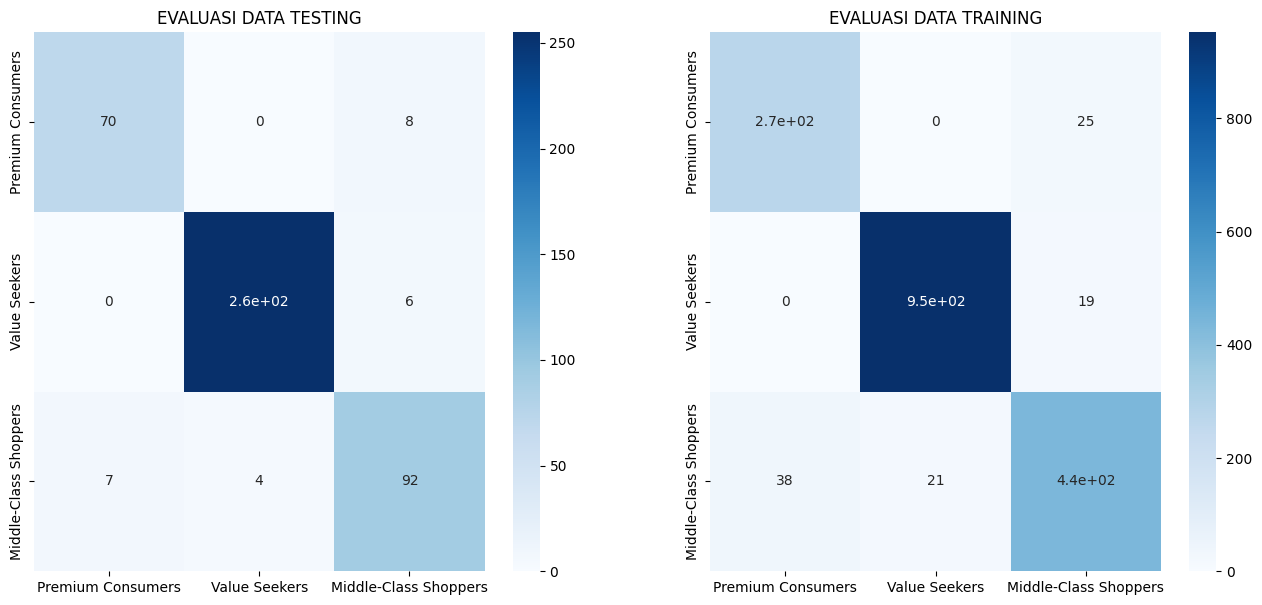

In [9]:
# CONFUSION MATRIX REGRESI LOGISTIK

matrix_logistic_test  = confusion_matrix(y_true= y_test,  y_pred= y_pred_logistic_test)
matrix_logistic_train = confusion_matrix(y_true= y_train, y_pred= y_pred_logistic_train)

fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

labels = ['Premium Consumers','Value Seekers','Middle-Class Shoppers']
title = ['EVALUASI DATA TESTING', 'EVALUASI DATA TRAINING']

for i , matrix in enumerate((matrix_logistic_test, matrix_logistic_train)):
    sns.heatmap(data= matrix, cmap='Blues', annot=True,fmt='.2g', xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(title[i])
plt.show()

In [10]:
# EXTRA TREE

y_pred_extratree_test = extratree.predict(x_test)

accuracy_extratree_test   = accuracy_score  (y_true= y_test, y_pred= y_pred_extratree_test)
f1_extratree_test         = f1_score        (y_true= y_test, y_pred= y_pred_extratree_test, average='weighted')
precision_extratree_test  = precision_score (y_true= y_test, y_pred= y_pred_extratree_test, average='weighted')
recall_extratree_test     = recall_score    (y_true= y_test, y_pred= y_pred_extratree_test, average='weighted')

print(f'EVALUASI DATA TESTING')
print(f'Accuracy Score : {accuracy_extratree_test}')
print(f'F1 Score       : {f1_extratree_test}')
print(f'precision_score: {precision_extratree_test}')
print(f'Recall Score   : {recall_extratree_test}\n')


# ------------------------------------------------------------------------------------------------------------------


y_pred_extratree_train = extratree.predict(x_train)

accuracy_extratree_train   = accuracy_score  (y_true= y_train, y_pred= y_pred_extratree_train)
f1_extratree_train         = f1_score        (y_true= y_train, y_pred= y_pred_extratree_train, average='weighted')
precision_extratree_train  = precision_score (y_true= y_train, y_pred= y_pred_extratree_train, average='weighted')
recall_extratree_train     = recall_score    (y_true= y_train, y_pred= y_pred_extratree_train, average='weighted')

print(f'EVALUASI DATA TRAINING')
print(f'Accuracy Score : {accuracy_extratree_train}')
print(f'F1 Score       : {f1_extratree_train}')
print(f'precision_score: {precision_extratree_train}')
print(f'Recall Score   : {recall_extratree_train}')

EVALUASI DATA TESTING
Accuracy Score : 0.9909502262443439
F1 Score       : 0.9909502262443439
precision_score: 0.9909502262443439
Recall Score   : 0.9909502262443439

EVALUASI DATA TRAINING
Accuracy Score : 1.0
F1 Score       : 1.0
precision_score: 1.0
Recall Score   : 1.0


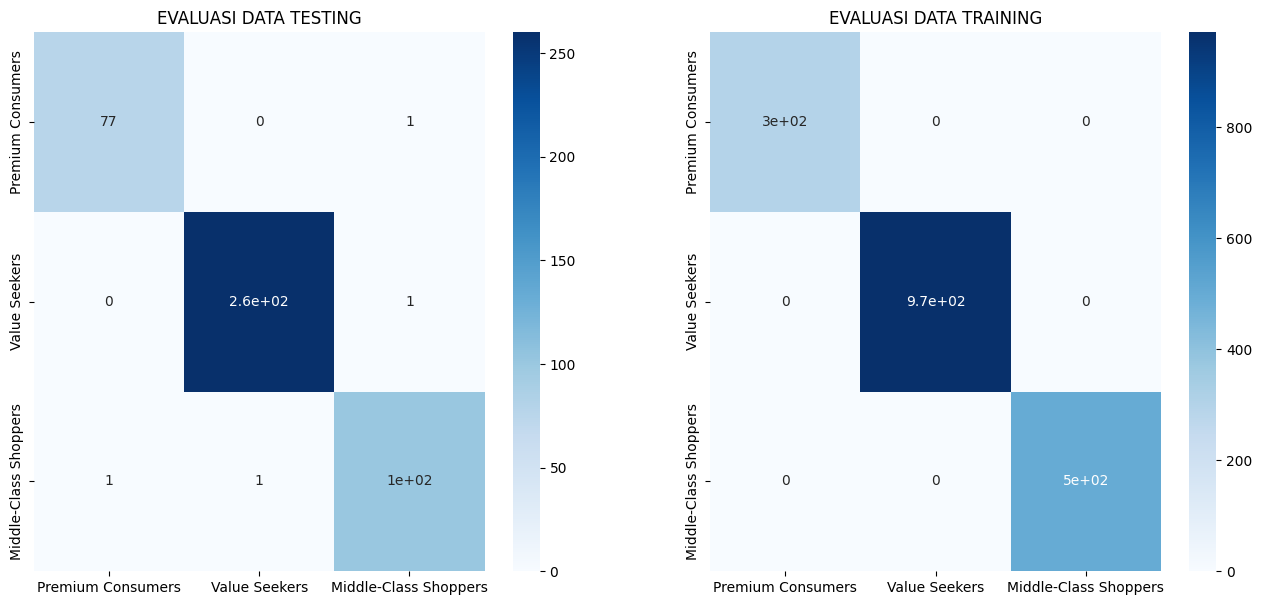

In [11]:
# EVALUASI EXTRA TREE

matrix_extratree_test  = confusion_matrix(y_true= y_test,  y_pred= y_pred_extratree_test)
matrix_extratree_train = confusion_matrix(y_true= y_train, y_pred= y_pred_extratree_train)

fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

labels = ['Premium Consumers','Value Seekers','Middle-Class Shoppers']
title = ['EVALUASI DATA TESTING', 'EVALUASI DATA TRAINING']

for i , matrix in enumerate((matrix_extratree_test, matrix_extratree_train)):
    sns.heatmap(data= matrix, cmap='Blues', annot=True,fmt='.2g', xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(title[i])
plt.show()

In [12]:
# SUPPORT VECTOR MACHINE

y_pred_svm_test = svm.predict(x_test)

accuracy_svm_test   = accuracy_score  (y_true= y_test, y_pred= y_pred_svm_test)
f1_svm_test         = f1_score        (y_true= y_test, y_pred= y_pred_svm_test, average='weighted')
precision_svm_test  = precision_score (y_true= y_test, y_pred= y_pred_svm_test, average='weighted')
recall_svm_test     = recall_score    (y_true= y_test, y_pred= y_pred_svm_test, average='weighted')

print(f'EVALUASI DATA TESTING')
print(f'Accuracy Score : {accuracy_svm_test}')
print(f'F1 Score       : {f1_svm_test}')
print(f'precision_score: {precision_svm_test}')
print(f'Recall Score   : {recall_svm_test}\n')


# ------------------------------------------------------------------------------------------------------------------


y_pred_svm_train = svm.predict(x_train)

accuracy_svm_train   = accuracy_score  (y_true= y_train, y_pred= y_pred_svm_train)
f1_svm_train         = f1_score        (y_true= y_train, y_pred= y_pred_svm_train, average='weighted')
precision_svm_train  = precision_score (y_true= y_train, y_pred= y_pred_svm_train, average='weighted')
recall_svm_train     = recall_score    (y_true= y_train, y_pred= y_pred_svm_train, average='weighted')

print(f'EVALUASI DATA TRAINING')
print(f'Accuracy Score : {accuracy_svm_train}')
print(f'F1 Score       : {f1_svm_train}')
print(f'precision_score: {precision_svm_train}')
print(f'Recall Score   : {recall_svm_train}')

EVALUASI DATA TESTING
Accuracy Score : 0.997737556561086
F1 Score       : 0.9977342013541952
precision_score: 0.9977461918413871
Recall Score   : 0.997737556561086

EVALUASI DATA TRAINING
Accuracy Score : 1.0
F1 Score       : 1.0
precision_score: 1.0
Recall Score   : 1.0


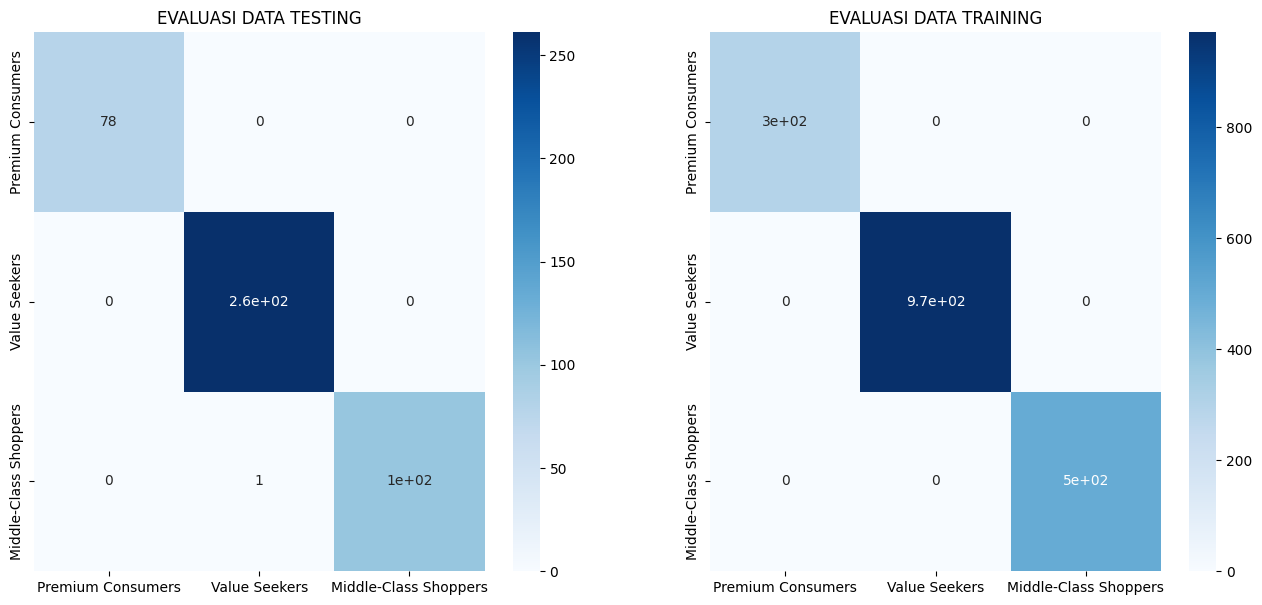

In [13]:
# EVALUASI SUPPORT VECTOR MACHINE

matrix_svm_test  = confusion_matrix(y_true= y_test,  y_pred= y_pred_svm_test)
matrix_svm_train = confusion_matrix(y_true= y_train, y_pred= y_pred_svm_train)

fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

labels = ['Premium Consumers','Value Seekers','Middle-Class Shoppers']
title = ['EVALUASI DATA TESTING', 'EVALUASI DATA TRAINING']

for i , matrix in enumerate((matrix_svm_test, matrix_svm_train)):
    sns.heatmap(data= matrix, cmap='Blues', annot=True,fmt='.2g', xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(title[i])
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

<ol><h5>Hasil Evaluasi Model Regresi Logistik:
    <li> Accuracy  : 0.943 </li>
    <li> Precision : 0.944 </li>
    <li> Recall    : 0.944 </li>
    <li> F-1       : 0.943 </li>
</ol></h5>

<ol><h5>Hasil Evaluasi Model Extra Trees :
    <li> Accuracy : 0.993 </li>
    <li> Precision: 0.993 </li>
    <li> Recall   : 0.993 </li>
    <li> F-1      : 0.993 </li>
</ol>

<ol><h5>Hasil Evaluasi Model SVM :
    <li> Accuracy : 0.998 </li>
    <li> Precision: 0.998 </li>
    <li> Recall   : 0.998 </li>
    <li> F-1      : 0.998 </li>
    <li> Roc-Auc  : 0.998 </li>
</ol>

<h5>Perbandingan Hasilnya :</h5>

- SVM menunjukkan hasil terbaik di semua metrik evaluasi (Accuracy, Precision, Recall, F-1 Score, dan Roc-Auc) dengan nilai 0.998, yang menunjukkan bahwa model ini mampu melakukan klasifikasi dengan sangat baik pada data yang testing.

- Extra Trees juga memberikan hasil yang sangat baik dengan Accuracy, Precision, Recall, F-1 Score sebesar 0.993, meskipun sedikit lebih rendah dibandingkan SVM. Namun, ini masih menunjukkan performa yang sangat baik.

- Regresi Logistik memiliki hasil yang baik dengan nilai sekitar 0.943 untuk Accuracy, Precision, Recall, dan F-1 Score, meskipun hasilnya lebih rendah dibandingkan kedua model sebelumnya. Algoritma ini yg terburuk dibanding ke 2 nya. namun , masih memberikan performa yg baik.

# Conclusion and Analysis

<h5><strong> IDENTIFIKASI PRECISION DAN RECALL </strong></h5>
Nilai precision dan recall saat evaluasi data training menggunakan model terbaik, yaitu SVM sebesar 1 . namun setelah di latih menggunakan data testing, nilai precision dan recall nya menurun menjadi 0.997 . artinya ada penurunan pada kemampuan untuk menangkap seluruh data positif (recall). Ini bisa menunjukkan bahwa ada kelas yang memiliki ketidakseimbangan atau model kesulitan dalam mendeteksi semua contoh dari kelas tertentu. </h5>

<h5><strong> APAKAH MODEL MENGALAMI OVERFITTING ATAU UNDERFITTING? </strong></h5>
Menurut saya model yg dibuat udah sempurna dan mantap. dari ketiga model yg saya buat, ketiga nya memberikan hasil accuracy dan f-1 score diatas 90% bahkan 2 model lagi (untuk EXTRATREE dan SVM) hasil accuracy dan f-1 score nya 100% untuk data training nya , dan 99.9% untuk data testing nya. 

<h5><strong> REKOMENDASI LANJUTAN </strong></h5>
Pada dataset yg saya miliki, terdapat ketidakseimbangan data (imbalance data). bisa terlihat jika data yg termasuk cluster 2 (Value Seekers) lebih banyak 50% daripada label cluster lainnya (Premium Consumers, Middle-Class Shoppers). dan untuk label cluster 1 (Premium Consumers), jumlah nya sangat sedikit, hanya 376 nasabah saja yg tergolong sebagai Pelanggan Premium.

<ol><strong> GOLONGAN NASABAH (CLUSTER): </strong>
        <li> Premium Consumers     : 376 </li>
        <li> Value Seekers         : 1232</li>
        <li> Middle-Class Shoppers : 600</li>
    </ol>

<ol><strong> TINDAKAN YG HARUS DILAKUKAN :</strong>
    <li> Mengumpulkan lebih banyak dataset, terutama untuk data "Premium Consumers". </li>
    <li> menggunakan Teknik <i>SMOTE (Synthetic Minority Over-Sampling Technique) </i> atau bisa juga menggunakan Teknik Undersampling untuk menyeimbangkan data antara kelas mayoritas dengan kelas minoritas. </li>
    <li> menggunakan algoritma lain yg lebih baik dari <i>Regresi Logistik </i>, seperti <i>XGBOOST</i> atau bisa menggunakan Teknik Deep Learning seperti <i>Neural Networks </i>.</li>